In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.lines import Line2D
%matplotlib inline
import matplotlib.pyplot as plt
import re
from matplotlib import gridspec
from scipy.stats import gaussian_kde
import baltic as bt

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [2]:
palms_all_variables=pd.read_csv('../data_files/palms_alltraits_curated_20210210.csv',sep='\t')
palms_all_variables.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index', 'species',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'bio1', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11',
       'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19',
       'decimalLatitude', 'decimalLongitude', 'nutrient_avail',
       'nutrient_retention', 'rooting_conditions', 'oxygen_avail_toroots',
       'excess_salts', 'toxicity', 'workability', 'aridity', 'tip_name',
       'induplicate', 'ind_variable', 'ind_variance', 'ind_cospalmate',
       'ind_pinnate', 'ind_entire', 'ind_bipinnate', 'reduplicate',
       'red_variable', 'red_variance', 'red_cospalmate', 'red_pinnate',
       'red_entire', 'plication', 'shape', 'variation', 'cospalmate_binomial',
       'pinnate_binomial', 'entire_binomial', 'variable_binomial',
       'bipinnate_binomial', 'PalmTribe', 'PalmSubfamily', 'Climbing',
       'Acaulescent', 'MaxStemHeight_m', 'MaxStemDia_cm', '

In [3]:
treeFileNexus='../data_files/Clean_1_1_MCCT_nexus.nex'
cc=bt.loadNexus(treeFileNexus,absoluteTime=False,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file

cc.treeStats()
cc.drawTree()
cc.sortBranches()


Tree height: 108.328870
Tree length: 18144.538310
strictly bifurcating tree
annotations present

Numbers of objects in tree: 5099 (2549 nodes and 2550 leaves)



In [4]:
tree_spp=[k.name for k in cc.getExternal()]
len(tree_spp)
intree=palms_all_variables[palms_all_variables['tip_name'].isin(tree_spp)]
intree

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,index,species,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,bio1,bio2,bio3,...,aridity_stand,nutrient_avail_stand,nutrient_retention_stand,rooting_conditions_stand,oxygen_avail_toroots_stand,excess_salts_stand,workability_stand,MaxLeafNumber_stand,Max_Rachis_Length_m_stand,StemHeightBladeLength_stand
0,0,0,0,0,Acoelorraphe_wrightii,79710.0,79711.0,255.0,94.0,64.0,...,-0.706065,-0.649803,-0.632376,-0.56053,-0.569647,-0.582408,-0.573034,1.313956,-0.819559,0.604758
1,1,1,1,1,Acrocomia_aculeata,41905.0,41906.0,252.0,108.0,69.0,...,-0.959057,-0.649803,-0.632376,-0.56053,-0.569647,-0.582408,-0.573034,1.653634,0.547930,0.992826
2,2,2,2,2,Acrocomia_crispa,31242.0,31243.0,247.0,97.0,62.0,...,-1.111976,-0.649803,-0.632376,-0.56053,-0.569647,-0.582408,-0.573034,0.376351,NaN,1.183509
3,3,3,3,3,Acrocomia_emensis,66723.0,66724.0,203.0,120.0,64.0,...,-0.864973,-0.649803,-0.632376,-0.56053,-0.569647,-0.582408,-0.573034,NaN,NaN,-1.567117
4,4,4,4,4,Acrocomia_glaucescens,49650.5,49651.5,240.0,127.0,67.0,...,-0.827384,-0.649803,-0.632376,-0.56053,-0.569647,-0.582408,-0.573034,NaN,NaN,-1.567117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2618,2618,2618,833,Calamus_tapa,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2619,2619,2619,2619,834,Saribus_papuanus,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.193564,NaN,1.367328
2620,2620,2620,2620,835,Calamus_rarispinosus,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2621,2621,2621,2621,836,Attalea_guianensis,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.567117


In [7]:
pairwise=intree[intree['shape'].isin(['entire','pinnate','cospalmate'])]
canopy_num={'canopy':1,np.nan:np.nan,'understorey':0}
pairwise['UnderstoreyCanopy_num']=pairwise['UnderstoreyCanopy'].map(canopy_num)
intree['UnderstoreyCanopy_num']=intree['UnderstoreyCanopy'].map(canopy_num)
intree['UnderstoreyCanopy_num'].unique()

array([ 1., nan,  0.])

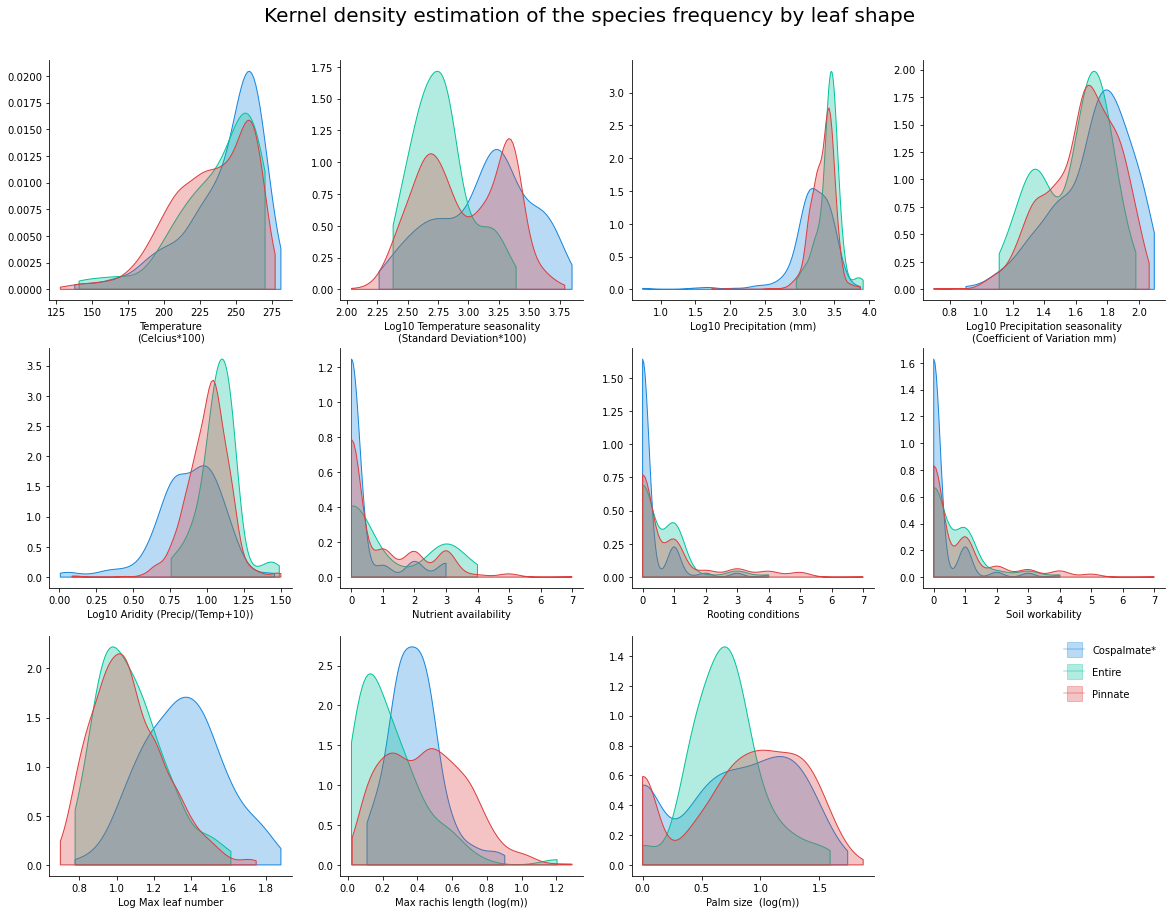

In [30]:
variables=['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength','UnderstoreyCanopy_num']

fig=plt.figure(figsize=(5*(4),5*(3)),facecolor='w')
fig.suptitle('Kernel density estimation of the species frequency by leaf shape', size=20,y=0.93)
outer_grid=gridspec.GridSpec(3,4, wspace=0.2, hspace=0.2)
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_text_dict={'cospalmate':'Cospalmate*','entire':'Entire','pinnate':'Pinnate'}

shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d"}

variable_dict={'bio1':'Temperature\n(Celcius*100)','bio2':'Mean Diurnal Range','bio3':'Isothermality (BIO2/BIO7)','bio4':'Log10 Temperature seasonality\n(Standard Deviation*100)',
                  'bio5':'Max Temperature of Warmest Month','bio6':'Min Temperature of Coldest Month','bio7':'Temperature Annual Range','bio8':'Mean Temperature of Wettest Quarter',
                  'bio9':'Mean Temperature of Driest Quarter','bio10':'Mean Temperature of Warmest Quarter','bio11':'Mean Temperature of Coldest Quarter','bio12':'Log10 Precipitation (mm)',
                  'bio13':'Precipitation of Wettest Month','bio14':'Precipitation of Driest Month','bio15':'Log10 Precipitation seasonality\n(Coefficient of Variation mm)','bio16':'Precipitation of Wettest Quarter',
                  'bio17':'Precipitation of Driest Quarter','bio18':'Precipitation of Warmest Quarter','bio19':'Precipitation of Coldest Quarter','nutrient_avail':'Nutrient availability',
                  'aridity':'Log10 Aridity (Precip/(Temp+10))',
                  'nutrient_retention':'Nutrient retention','rooting_conditions':'Rooting conditions','oxygen_avail_toroots':'Oxygen availability to roots','excess_salts':'Excess salts in soil',
                  'toxicity':'Soil toxicity','workability':'Soil workability','MaxStemHeight_m': 'Max Stem Height (m)','MaxStemDia_cm':'Max Stem Diameter (m)',
                  'MaxLeafNumber':'Log Max leaf number','Max_Blade_Length_m':'Max blade length (m)','Max_Rachis_Length_m':'Max rachis length (log(m))','Max_Petiole_length_m':'Max petiole length (m)',
                  'StemHeightBladeLength': 'Palm size  (log(m))','UnderstoreyCanopy_num':'Understory/Canopy'}

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    for key,value in shape_colour_dict.items():
        values=pairwise[pairwise['shape']==key][variables[xx]].dropna().astype('float').values
        kde=gaussian_kde(values)
        x_grid=np.linspace(min(values),max(values),100)
        ax.fill_between(x_grid,kde(x_grid),alpha=0.3,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
        ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('%s'%(variable_dict[variables[xx]]))
        
for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[1,xx])
    for key,value in shape_colour_dict.items():
        values=pairwise[pairwise['shape']==key][variables[xx+4]].dropna().astype('float').values
        kde=gaussian_kde(values)
        x_grid=np.linspace(min(values),max(values),100)
        ax.fill_between(x_grid,kde(x_grid),alpha=0.3,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
        ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('%s'%(variable_dict[variables[xx+4]]))
        
for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[2,xx])
    xxa=xx+8
    if xxa <=10:
        for key,value in shape_colour_dict.items():
            values=pairwise[pairwise['shape']==key][variables[xx+8]].dropna().astype('float').values
            kde=gaussian_kde(values)
            x_grid=np.linspace(min(values),max(values),100)
            ax.fill_between(x_grid,kde(x_grid),alpha=0.3,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
            ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlabel('%s'%(variable_dict[variables[xx+8]]))
    else:
            [ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]
            ax.set_xticklabels([]) ; ax.set_yticklabels([])
            plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
            legend_elements=[]
            for key,value in shape_colour_dict.items():
                legend_elements.append(Line2D([0],[0],marker='s',color=value,label=shape_text_dict[key],markersize=15,alpha=0.3))
            ax.legend(handles=legend_elements, loc='best',labelspacing=1.2,frameon=False)
# plt.savefig('../data_files/Fig_1_KDEraw_20210211.pdf',dpi=300)
plt.show()

In [11]:
temp=intree[(intree['shape']=='pinnate') | (intree['shape']=='entire')]
temp.groupby(by='shape')[['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength']].median()

,bio1,bio4,bio12,bio15,aridity,nutrient_avail,rooting_conditions,workability,MaxLeafNumber,Max_Rachis_Length_m,StemHeightBladeLength
shape,,,,,,,,,,,
entire,246.0,2.757775,3.445293,1.653213,1.085793,0.0,0.0,0.0,1.041393,0.190332,0.698970
pinnate,237.0,2.936011,3.365488,1.672098,1.018793,0.0,0.0,0.0,1.041393,0.447158,0.939519


In [12]:
temp.groupby(by='shape')[['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength']].quantile(.01)

,bio1,bio4,bio12,bio15,aridity,nutrient_avail,rooting_conditions,workability,MaxLeafNumber,Max_Rachis_Length_m,StemHeightBladeLength
shape,,,,,,,,,,,
entire,149.36,2.396315,3.027313,1.138404,0.766892,0.0,0.0,0.0,0.778151,0.021189,0.0
pinnate,150.80,2.314068,2.888066,1.079181,0.638471,0.0,0.0,0.0,0.698970,0.056905,0.0


In [13]:
temp.groupby(by='shape')[['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength']].quantile(1)

,bio1,bio4,bio12,bio15,aridity,nutrient_avail,rooting_conditions,workability,MaxLeafNumber,Max_Rachis_Length_m,StemHeightBladeLength
shape,,,,,,,,,,,
entire,270.0,3.392345,3.913814,1.980003,1.489522,4.0,4.0,4.0,1.612784,1.204120,1.591065
pinnate,277.0,3.792532,3.876333,2.064458,1.500434,7.0,7.0,7.0,1.748188,1.290035,1.871573


In [14]:
# print('median entire plant size',np.exp(0.698970))
# print('median pinnate plant size',np.exp(0.970811))
# it is log10
print('median entire plant size',10**0.698970)
print('median pinnate plant size',10**0.970811)

median entire plant size 4.999999950079738
median pinnate plant size 9.349986848430587


In [15]:
print('range entire plant size',10**0.000,' ',10**1.591065)
print('range pinnate plant size',10**0.000000,' ',10**1.871573)

range entire plant size 1.0   39.00003528935803
range pinnate plant size 1.0   74.40001104178657


In [17]:
# print(list(intree.columns))
cold=['Trachycarpeae','Areceae','Ceroxyleae']
intree[intree['PalmTribe'].isin(cold)].groupby(by=['shape']).count()[['species']]

,species
shape,
cospalmate,290
entire,44
pinnate,642
variable,9


Trachycarpus fortunei, one of the most cold tolerant of all cultivated palms, is hardy in the British Isles

Rhapidophyllum, Common names and uses: Needle palm. Cultivated as a cold-tolerant ornamental

Mesocarp of Butia capitata is edible and can be made into jams; several species are widespread as slow-growing cold-tolerant ornamentals.

Parajubaea torallyi is found in humid ravines of spectacular sandstone mountains at high elevations (2400–3400 m), where it does not rain for ten months of the year,. These palms should make handsome ornamentals in cold and dry areas.



In [20]:
print(intree['bio1'].max())
print(intree['bio1'].quantile(0.75))

281.0
258.0


In [29]:
def jitter_randarray(start,stop,length,digits):
    jitterx=[]
    for i in range(0,length):
        n=round(random.uniform(start,stop),digits)
        jitterx.append(n)
    return jitterx

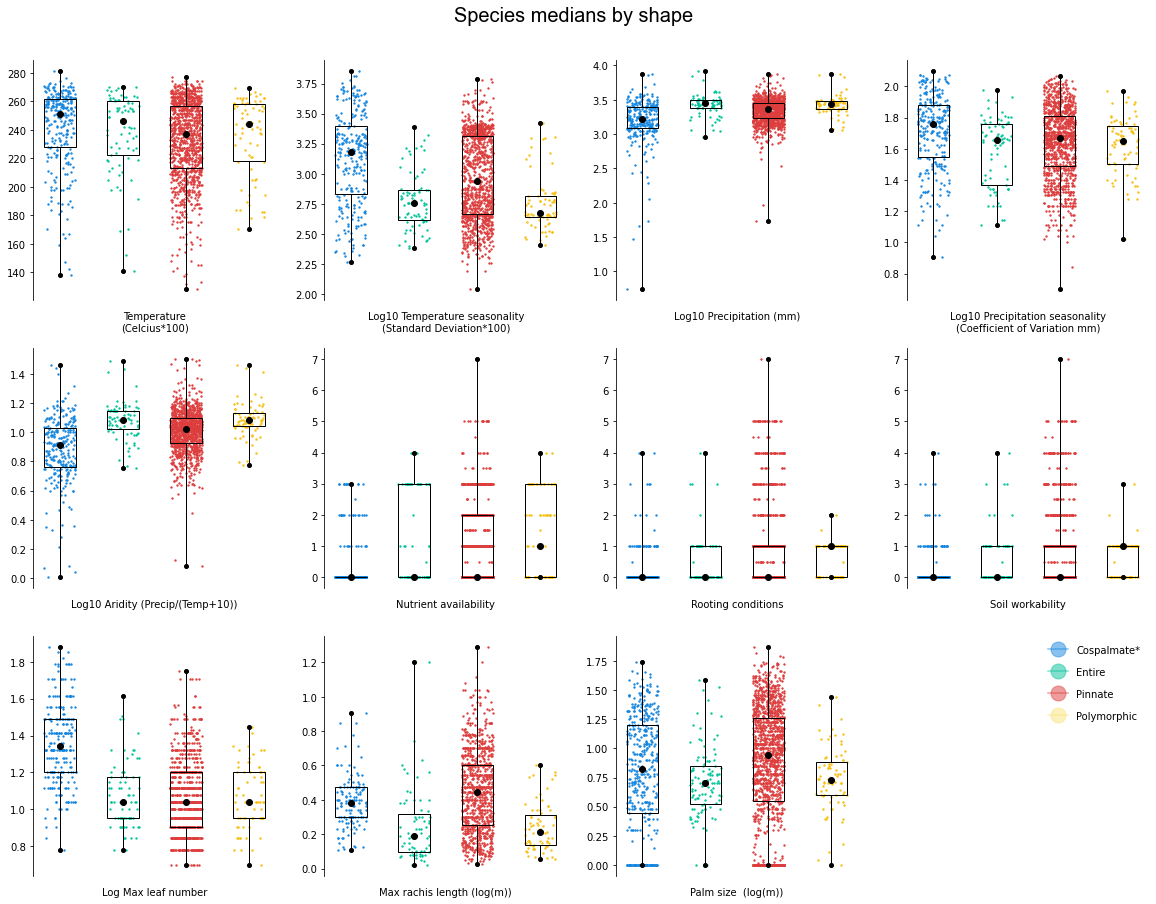

In [31]:
# boxplots
import random
variables=['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength']#,'UnderstoreyCanopy_num']

fig=plt.figure(figsize=(5*(4),5*(3)),facecolor='w')
fig.suptitle('Species medians by shape', size=20,y=0.93,fontname='arial')
outer_grid=gridspec.GridSpec(3,4, wspace=0.2, hspace=0.2)
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_text_dict={'cospalmate':'Cospalmate*','entire':'Entire','pinnate':'Pinnate','variable':'Polymorphic'}

shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#fbe279"}

edge_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#f7ba00"}

variable_dict={'bio1':'Temperature\n(Celcius*100)','bio2':'Mean Diurnal Range','bio3':'Isothermality (BIO2/BIO7)','bio4':'Log10 Temperature seasonality\n(Standard Deviation*100)',
                  'bio5':'Max Temperature of Warmest Month','bio6':'Min Temperature of Coldest Month','bio7':'Temperature Annual Range','bio8':'Mean Temperature of Wettest Quarter',
                  'bio9':'Mean Temperature of Driest Quarter','bio10':'Mean Temperature of Warmest Quarter','bio11':'Mean Temperature of Coldest Quarter','bio12':'Log10 Precipitation (mm)',
                  'bio13':'Precipitation of Wettest Month','bio14':'Precipitation of Driest Month','bio15':'Log10 Precipitation seasonality\n(Coefficient of Variation mm)','bio16':'Precipitation of Wettest Quarter',
                  'bio17':'Precipitation of Driest Quarter','bio18':'Precipitation of Warmest Quarter','bio19':'Precipitation of Coldest Quarter','nutrient_avail':'Nutrient availability',
                  'aridity':'Log10 Aridity (Precip/(Temp+10))',
                  'nutrient_retention':'Nutrient retention','rooting_conditions':'Rooting conditions','oxygen_avail_toroots':'Oxygen availability to roots','excess_salts':'Excess salts in soil',
                  'toxicity':'Soil toxicity','workability':'Soil workability','MaxStemHeight_m': 'Max Stem Height (m)','MaxStemDia_cm':'Max Stem Diameter (m)',
                  'MaxLeafNumber':'Log Max leaf number','Max_Blade_Length_m':'Max blade length (m)','Max_Rachis_Length_m':'Max rachis length (log(m))','Max_Petiole_length_m':'Max petiole length (m)',
                  'StemHeightBladeLength': 'Palm size  (log(m))','UnderstoreyCanopy_num':'Understory/Canopy'}

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        width=0.5
        xmin=(x-(width/2));xmax=(xmin+width)
        jittx=jitter_randarray(xmin,xmax,len(temp),2)
        ax.scatter(jittx,temp[variables[xx]],color=shape_colour_dict[shape],s=2,alpha=0.9,edgecolors=edge_colour_dict[shape])
        # boxes
        base=temp[variables[xx]].quantile(0.25)
        height=temp[variables[xx]].quantile(0.75)-base # base+temp[variables[xx]].quantile(0.75)
        median=temp[variables[xx]].median()
        box=mpl.patches.Rectangle((x-(width/2),base),width,height,facecolor='none',edgecolor='k',lw=1) #shape_colour_dict[shape]) #616161
        ax.add_patch(box)
        ax.plot(x,median,marker='o',color='k',markersize=6)
        plt.vlines(x,temp[variables[xx]].min(),base,color='k',lw=1);ax.plot(x,temp[variables[xx]].min(),marker='o',color='k',markersize=4)
        plt.vlines(x,temp[variables[xx]].quantile(0.75),temp[variables[xx]].max(),color='k',lw=1);ax.plot(x,temp[variables[xx]].max(),marker='o',color='k',markersize=4)
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.xlabel(variable_dict[variables[xx]])
        x+=1
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        width=0.5
        xmin=(x-(width/2));xmax=(xmin+width)
        jittx=jitter_randarray(xmin,xmax,len(temp),2)
        ax.scatter(jittx,temp[variables[xx]],color=shape_colour_dict[shape],s=2,alpha=0.9,edgecolors=edge_colour_dict[shape])
        # boxes
        base=temp[variables[xx]].quantile(0.25)
        height=temp[variables[xx]].quantile(0.75)-base # base+temp[variables[xx]].quantile(0.75)
        median=temp[variables[xx]].median()
        box=mpl.patches.Rectangle((x-(width/2),base),width,height,facecolor='none',edgecolor='k',lw=1) #shape_colour_dict[shape]) #616161
        ax.add_patch(box)
        ax.plot(x,median,marker='o',color='k',markersize=6)
        plt.vlines(x,temp[variables[xx]].min(),base,color='k',lw=1);ax.plot(x,temp[variables[xx]].min(),marker='o',color='k',markersize=4)
        plt.vlines(x,temp[variables[xx]].quantile(0.75),temp[variables[xx]].max(),color='k',lw=1);ax.plot(x,temp[variables[xx]].max(),marker='o',color='k',markersize=4)
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.xlabel(variable_dict[variables[xx]])
        x+=1
        
for xx in range(8,13,1):
    if xx <= 11:
        try:
            ax=plt.subplot(outer_grid[2,xx-8])
            x=0
            for shape in shape_colour_dict.keys():
                temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
                width=0.5
                xmin=(x-(width/2));xmax=(xmin+width)
                jittx=jitter_randarray(xmin,xmax,len(temp),2)
                ax.scatter(jittx,temp[variables[xx]],color=shape_colour_dict[shape],s=2,alpha=0.9,edgecolors=edge_colour_dict[shape])
                # boxes
                base=temp[variables[xx]].quantile(0.25)
                height=temp[variables[xx]].quantile(0.75)-base # base+temp[variables[xx]].quantile(0.75)
                median=temp[variables[xx]].median()
                box=mpl.patches.Rectangle((x-(width/2),base),width,height,facecolor='none',edgecolor='k',lw=1) #shape_colour_dict[shape]) #616161
                ax.add_patch(box)
                ax.plot(x,median,marker='o',color='k',markersize=6)
                plt.vlines(x,temp[variables[xx]].min(),base,color='k',lw=1);ax.plot(x,temp[variables[xx]].min(),marker='o',color='k',markersize=4)
                plt.vlines(x,temp[variables[xx]].quantile(0.75),temp[variables[xx]].max(),color='k',lw=1);ax.plot(x,temp[variables[xx]].max(),marker='o',color='k',markersize=4)
                [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
                ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False

                plt.xlabel(variable_dict[variables[xx]])
                x+=1
        except:
            pass
    else:
        [ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]
        ax.set_xticklabels([]) ; ax.set_yticklabels([])
        plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=15,alpha=0.5))
        ax.legend(handles=legend_elements, loc='best',labelspacing=1.2,frameon=False)
    ax.plot()
# plt.savefig('../data_files/Fig_1_boxplots_20210211.pdf',dpi=300)
plt.show()

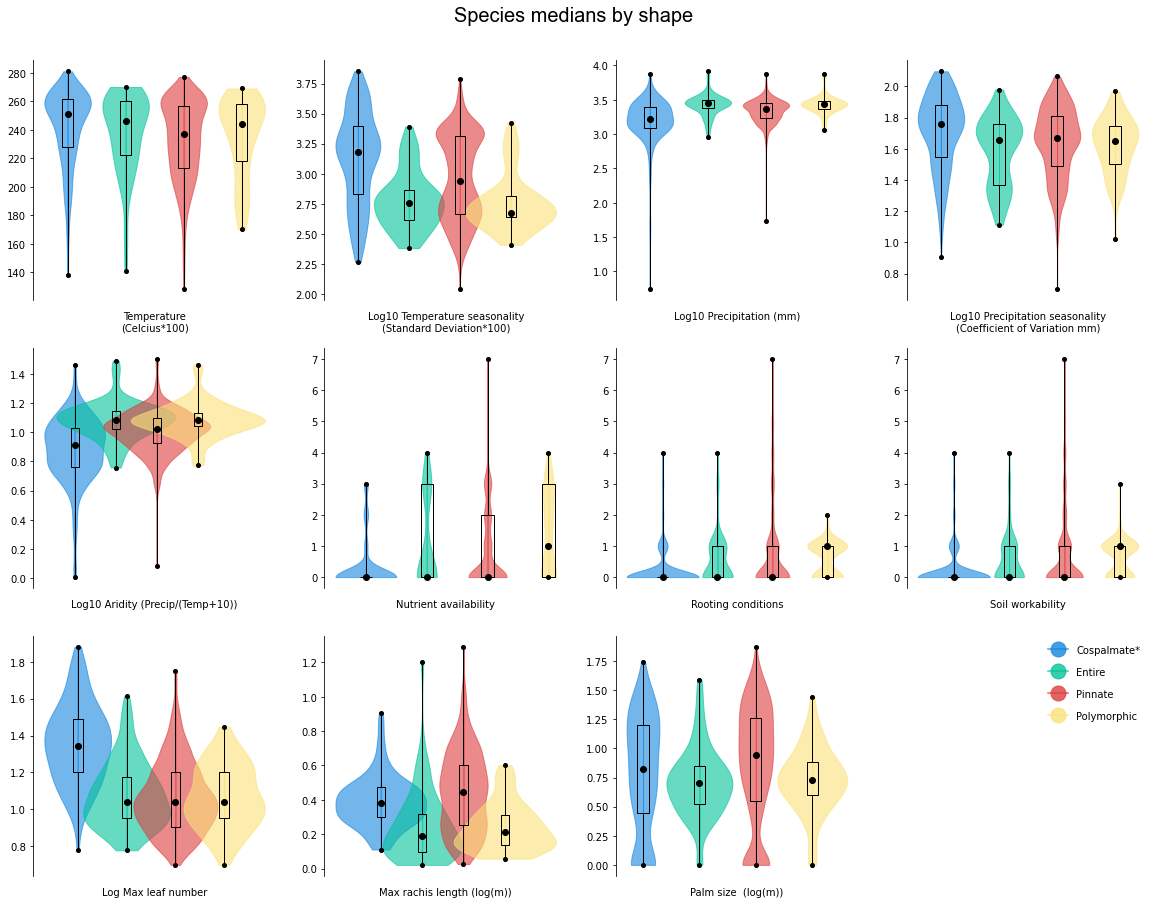

In [32]:
# boxplots
import random
variables=['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength']#,'UnderstoreyCanopy_num']

fig=plt.figure(figsize=(5*(4),5*(3)),facecolor='w')
fig.suptitle('Species medians by shape', size=20,y=0.93,fontname='arial')
outer_grid=gridspec.GridSpec(3,4, wspace=0.2, hspace=0.2)
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_text_dict={'cospalmate':'Cospalmate*','entire':'Entire','pinnate':'Pinnate','variable':'Polymorphic'}

shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#fbe279"}

edge_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#f7ba00"}

variable_dict={'bio1':'Temperature\n(Celcius*100)','bio2':'Mean Diurnal Range','bio3':'Isothermality (BIO2/BIO7)','bio4':'Log10 Temperature seasonality\n(Standard Deviation*100)',
                  'bio5':'Max Temperature of Warmest Month','bio6':'Min Temperature of Coldest Month','bio7':'Temperature Annual Range','bio8':'Mean Temperature of Wettest Quarter',
                  'bio9':'Mean Temperature of Driest Quarter','bio10':'Mean Temperature of Warmest Quarter','bio11':'Mean Temperature of Coldest Quarter','bio12':'Log10 Precipitation (mm)',
                  'bio13':'Precipitation of Wettest Month','bio14':'Precipitation of Driest Month','bio15':'Log10 Precipitation seasonality\n(Coefficient of Variation mm)','bio16':'Precipitation of Wettest Quarter',
                  'bio17':'Precipitation of Driest Quarter','bio18':'Precipitation of Warmest Quarter','bio19':'Precipitation of Coldest Quarter','nutrient_avail':'Nutrient availability',
                  'aridity':'Log10 Aridity (Precip/(Temp+10))',
                  'nutrient_retention':'Nutrient retention','rooting_conditions':'Rooting conditions','oxygen_avail_toroots':'Oxygen availability to roots','excess_salts':'Excess salts in soil',
                  'toxicity':'Soil toxicity','workability':'Soil workability','MaxStemHeight_m': 'Max Stem Height (m)','MaxStemDia_cm':'Max Stem Diameter (m)',
                  'MaxLeafNumber':'Log Max leaf number','Max_Blade_Length_m':'Max blade length (m)','Max_Rachis_Length_m':'Max rachis length (log(m))','Max_Petiole_length_m':'Max petiole length (m)',
                  'StemHeightBladeLength': 'Palm size  (log(m))','UnderstoreyCanopy_num':'Understory/Canopy'}

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        
        if xx == 1:
            values=temp[variables[xx]].dropna().values
            kde=gaussian_kde(values)
            y_grid=np.linspace(min(values),max(values),100)
            ax.fill_betweenx(y_grid,x1=-kde(y_grid)+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
            ax.fill_betweenx(y_grid,x1=kde(y_grid)+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
        else:
            values=temp[variables[xx]].dropna().values
            kde=gaussian_kde(values)
            y_grid=np.linspace(min(values),max(values),100)
            ax.fill_betweenx(y_grid,x1=-(kde(y_grid)/max(kde(y_grid)))+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
            ax.fill_betweenx(y_grid,x1=(kde(y_grid)/max(kde(y_grid)))+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
        # boxes
        base=temp[variables[xx]].quantile(0.25)
        height=temp[variables[xx]].quantile(0.75)-base # base+temp[variables[xx]].quantile(0.75)
        median=temp[variables[xx]].median()
        box=mpl.patches.Rectangle((x-(width/2),base),width,height,facecolor='none',edgecolor='k',lw=1) #shape_colour_dict[shape]) #616161
        ax.add_patch(box)
        ax.plot(x,median,marker='o',color='k',markersize=6)
        plt.vlines(x,temp[variables[xx]].min(),base,color='k',lw=1);ax.plot(x,temp[variables[xx]].min(),marker='o',color='k',markersize=4)
        plt.vlines(x,temp[variables[xx]].quantile(0.75),temp[variables[xx]].max(),color='k',lw=1);ax.plot(x,temp[variables[xx]].max(),marker='o',color='k',markersize=4)
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.xlabel(variable_dict[variables[xx]])
        x+=2.5
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]

        values=temp[variables[xx]].dropna().values
        kde=gaussian_kde(values)
        y_grid=np.linspace(min(values),max(values),100)
        ax.fill_betweenx(y_grid,x1=-kde(y_grid)+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
        ax.fill_betweenx(y_grid,x1=kde(y_grid)+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
        # boxes
        base=temp[variables[xx]].quantile(0.25)
        height=temp[variables[xx]].quantile(0.75)-base # base+temp[variables[xx]].quantile(0.75)
        median=temp[variables[xx]].median()
        box=mpl.patches.Rectangle((x-(width/2),base),width,height,facecolor='none',edgecolor='k',lw=1) #shape_colour_dict[shape]) #616161
        ax.add_patch(box)
        ax.plot(x,median,marker='o',color='k',markersize=6)
        plt.vlines(x,temp[variables[xx]].min(),base,color='k',lw=1);ax.plot(x,temp[variables[xx]].min(),marker='o',color='k',markersize=4)
        plt.vlines(x,temp[variables[xx]].quantile(0.75),temp[variables[xx]].max(),color='k',lw=1);ax.plot(x,temp[variables[xx]].max(),marker='o',color='k',markersize=4)
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.xlabel(variable_dict[variables[xx]])
        x+=2.5
        
for xx in range(8,13,1):
    if xx <= 11:
        try:
            ax=plt.subplot(outer_grid[2,xx-8])
            x=0
            for shape in shape_colour_dict.keys():
                temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
                
                values=temp[variables[xx]].dropna().values
                kde=gaussian_kde(values)
                y_grid=np.linspace(min(values),max(values),100)
                ax.fill_betweenx(y_grid,x1=-kde(y_grid)+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
                ax.fill_betweenx(y_grid,x1=kde(y_grid)+x,x2=x,alpha=0.6,edgecolor=shape_colour_dict[shape],facecolor=shape_colour_dict[shape])
                # boxes
                base=temp[variables[xx]].quantile(0.25)
                height=temp[variables[xx]].quantile(0.75)-base # base+temp[variables[xx]].quantile(0.75)
                median=temp[variables[xx]].median()
                box=mpl.patches.Rectangle((x-(width/2),base),width,height,facecolor='none',edgecolor='k',lw=1) #shape_colour_dict[shape]) #616161
                ax.add_patch(box)
                ax.plot(x,median,marker='o',color='k',markersize=6)
                plt.vlines(x,temp[variables[xx]].min(),base,color='k',lw=1);ax.plot(x,temp[variables[xx]].min(),marker='o',color='k',markersize=4)
                plt.vlines(x,temp[variables[xx]].quantile(0.75),temp[variables[xx]].max(),color='k',lw=1);ax.plot(x,temp[variables[xx]].max(),marker='o',color='k',markersize=4)
                [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
                ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False

                plt.xlabel(variable_dict[variables[xx]])
                x+=2.5
        except:
            pass
    else:
        [ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]
        ax.set_xticklabels([]) ; ax.set_yticklabels([])
        plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=15,alpha=0.8))
        ax.legend(handles=legend_elements, loc='best',labelspacing=1.2,frameon=False)
    ax.plot()
# plt.savefig('../data_files/Fig_1_boxplots_20210211.pdf',dpi=300)
plt.show()